In [198]:
import unicodecsv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#check the data construction

In [199]:
import unicodecsv
def read_csv(file_name):
    with open(file_name, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
titanic_data = read_csv('titanic_data.csv')
print titanic_data[0]

{u'Fare': u'7.25', u'Name': u'Braund, Mr. Owen Harris', u'Embarked': u'S', u'Age': u'22', u'Parch': u'0', u'Pclass': u'3', u'Sex': u'male', u'Survived': u'0', u'SibSp': u'1', u'PassengerId': u'1', u'Ticket': u'A/5 21171', u'Cabin': u''}


#adj data type 
#Age lost
#Cabin lost

In [200]:
def parse_maybe_float(i):
    if i == '':
        return None
    else:
        return float(i)
    
def parse_maybe_str(i):
    if i == '':
        return None
    else:
        return str(i)
    
for titanic_data_item in titanic_data:
    titanic_data_item['Age'] = parse_maybe_float(titanic_data_item['Age'])
    titanic_data_item['Cabin'] = parse_maybe_str(titanic_data_item['Cabin'])
titanic_data[0]

{u'Age': 22.0,
 u'Cabin': None,
 u'Embarked': u'S',
 u'Fare': u'7.25',
 u'Name': u'Braund, Mr. Owen Harris',
 u'Parch': u'0',
 u'PassengerId': u'1',
 u'Pclass': u'3',
 u'Sex': u'male',
 u'SibSp': u'1',
 u'Survived': u'0',
 u'Ticket': u'A/5 21171'}

In [201]:
len(titanic_data)

891

In [202]:
titanic_df=pd.read_csv('titanic_data.csv')

In [203]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Age Cabin Embarked lost some  data

In [204]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


#Survived% is only 38.38%

In [205]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [206]:
#count the survived and no survived Passenger
num_survived = titanic_df['Survived'].sum()
num_no_survived = 891 - num_survived

print num_survived
print num_no_survived

342
549


#draw a Figure  to show Survived and Victim

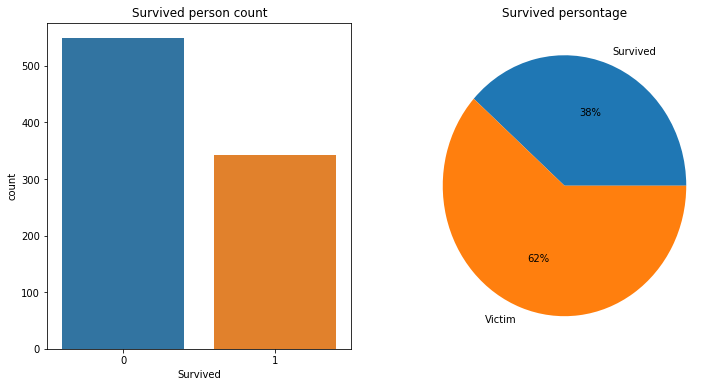

In [259]:

plt.figure(figsize = (12,6))
plt.subplot(121)
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survived person count')

plt.subplot(122)
plt.pie([num_survived, num_no_survived],labels=['Survived','Victim'],autopct='%1.0f%%')
plt.title('Survived persontage') 

plt.show()

In [260]:
#according to the film, I prefer to check the persentage of female survived 
#step 1  I should check how many people on Titanic before wrecked
male_sum = titanic_df['Sex'][titanic_df['Sex'] == 'male'].count()
female_sum = titanic_df['Sex'][titanic_df['Sex'] == 'female'].count()
print male_sum
print female_sum

577
314


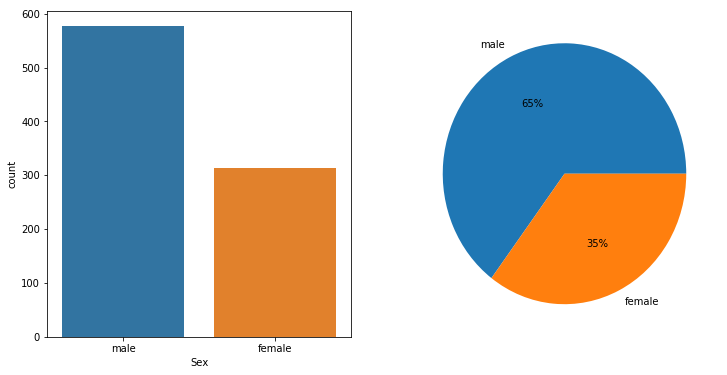

In [261]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x='Sex', data=titanic_df)
plt.subplot(122)
plt.pie([male_sum,female_sum],labels=['male', 'female'],autopct='%1.0f%%')
plt.show()


#there are 577 male, and 314 female before wrecked

In [209]:
survived_df = titanic_df[titanic_df[ 'Survived'] == 1 ]

#after the Titanic wreck
# check the Survived of male and female

In [262]:
survived_male_sum = survived_df['Sex'][survived_df['Sex'] == 'male'].count()
survived_female_sum = survived_df['Sex'][survived_df['Sex'] == 'female'].count()
print survived_male_sum 
print survived_female_sum

109
233


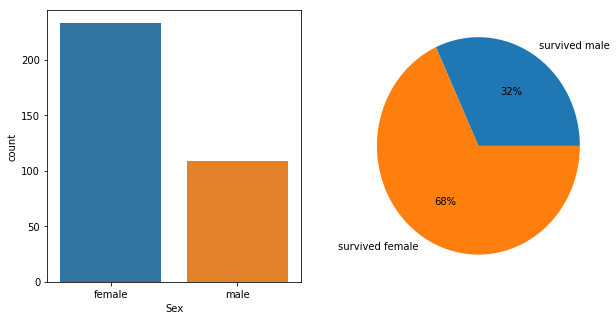

In [266]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Sex', data=survived_df)
plt.subplot(122)
plt.pie([survived_male_sum, survived_female_sum],labels=['survived male', 'survived female'],autopct='%1.0f%%')
plt.show()


#the survived female 109 is more than male 233,

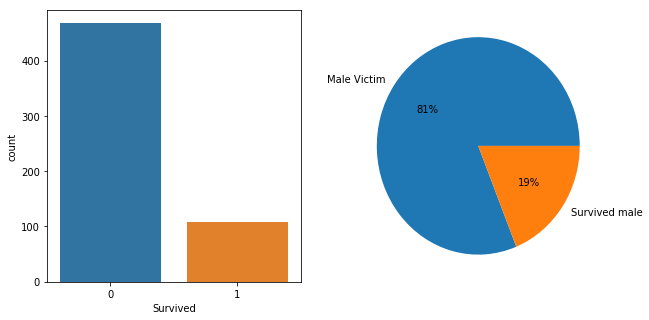

In [264]:

male_df = titanic_df[titanic_df['Sex'] == 'male']

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = male_df)
plt.subplot(122)
plt.pie([male_df['Survived'][male_df['Survived'] == 0].count(),male_df['Survived'][male_df['Survived'] == 1].count()],labels=['Male Victim', 'Survived male'],autopct='%1.0f%%')
plt.show()

#Survived persentage of male

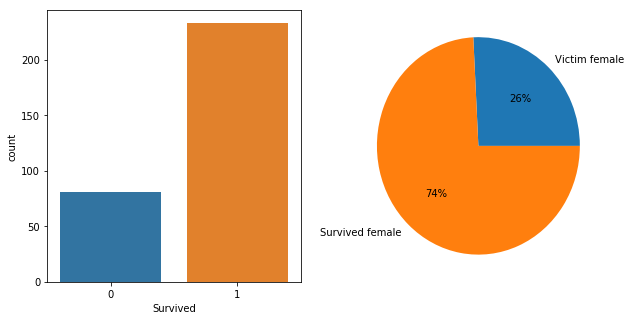

In [265]:
female_df = titanic_df[titanic_df['Sex'] == 'female']

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = female_df)
plt.subplot(122)
plt.pie([female_df['Survived'][female_df['Survived'] == 0].count(),female_df['Survived'][female_df['Survived'] == 1].count()],labels=['Victim female', 'Survived female'],autopct='%1.0f%%')
plt.show()



 #the survived female 74% percentage is higher than male 19%， Titanic film tells us the true,from the result above.

# Secondly,I prefre to check the Survived age. as the Titanic Film.
# I found the some of the age data is lost; we need to fill in  the lost age of data.

In [214]:
avg_age_titanic   = titanic_df["Age"].mean()
std_age_titanic   = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()


rand_age = np.random.randint(avg_age_titanic - std_age_titanic, avg_age_titanic + std_age_titanic, size = count_nan_age_titanic)

titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_age

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


#random age，range (mean - std， mean + std)

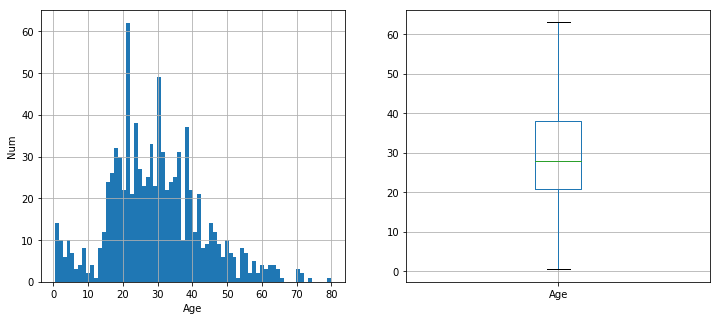

In [215]:
plt.figure(figsize=(12,5))
plt.subplot(121)
titanic_df['Age'].hist(bins = 70)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
titanic_df.boxplot(column='Age', showfliers=False)

plt.show()

#acccording to the hist, I found the age data Concentrated in the peak age between 20-40 years of age，the boxplot may show the result  visually。

In [267]:
titanic_df['Age'].describe()


count    891.000000
mean      29.496263
std       13.561395
min        0.420000
25%       20.750000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#According to the sample,total 891, the avg is  29.59, std  13.54,the youngest is 0.42, the eldest is 80.

# before analysis the age result,I group the age data to children,Teenagers，adult，and elderly people 4 groups

In [269]:
bins = [0, 12, 18, 65, 100]
titanic_df['Age_group'] = pd.cut(titanic_df['Age'], bins)
by_age = titanic_df.groupby('Age_group')['Survived'].mean()
by_age

Age_group
(0, 12]      0.579710
(12, 18]     0.411765
(18, 65]     0.363764
(65, 100]    0.125000
Name: Survived, dtype: float64

#the Survived persontage of children is higher than Teenagers and adult, the elderly people  is lowest.

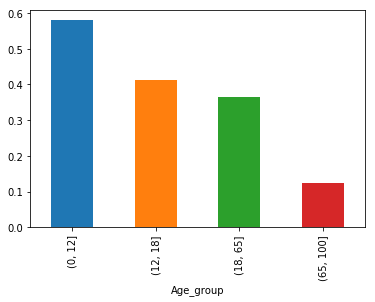

In [218]:
by_age.plot(kind = "bar")

#Survived persentage by different Pclass

In [219]:
titanic_df[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


#analysis data from the Pclass before the Ship wreck

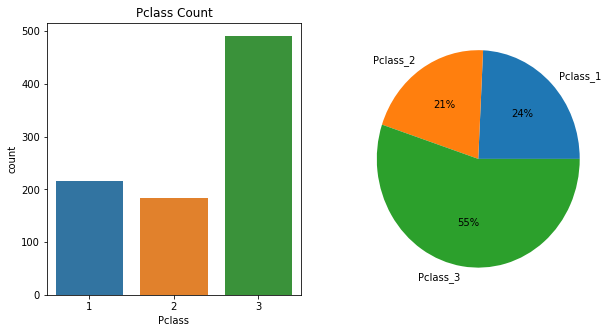

In [270]:
plt.figure(figsize= (10 ,5))
plt.subplot(121)
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Pclass Count') 

plt.subplot(122)
plt.pie(titanic_df[['Pclass','Survived']].groupby(['Pclass']).count(),labels=['Pclass_1','Pclass_2','Pclass_3'],autopct='%1.0f%%')

plt.show()


In [271]:
survived_df[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


# analysis data from the Pclass before the Ship wreck

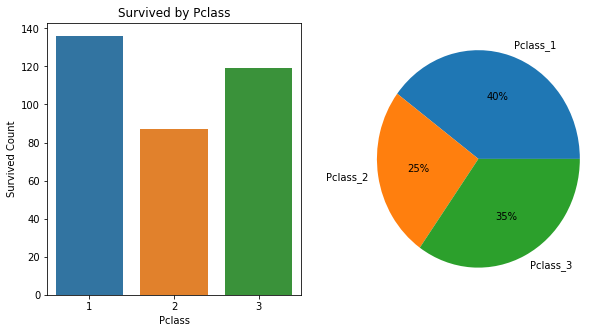

In [273]:
plt.figure(figsize= (10, 5))
plt.subplot(121)
sns.countplot(x='Pclass', data=survived_df)
plt.title('Survived by Pclass') 
plt.ylabel('Survived Count')

plt.subplot(122)
plt.pie(survived_df[['Pclass','Survived']].groupby(['Pclass']).sum(),labels=['Pclass_1','Pclass_2','Pclass_3'],autopct='%1.0f%%')
plt.show()

In [274]:
bins = [0 ,1, 2, 3]
titanic_df['Pclass_group'] = pd.cut(titanic_df['Pclass'], bins)
by_Pclass = titanic_df.groupby('Pclass_group')['Survived'].mean()
by_Pclass
# the percentage and count of Survived from Pclass_1 is highest

Pclass_group
(0, 1]    0.629630
(1, 2]    0.472826
(2, 3]    0.242363
Name: Survived, dtype: float64

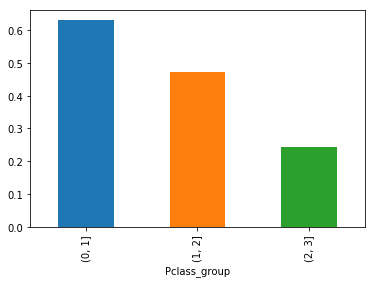

In [275]:
by_Pclass.plot(kind = "bar")

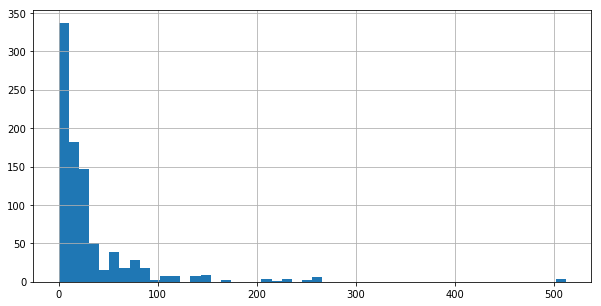

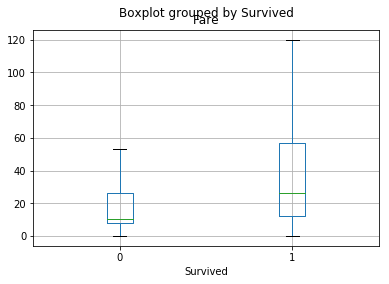

In [225]:
#Survived by Fare
plt.figure(figsize=(10,5))
titanic_df['Fare'].hist(bins = 50)

titanic_df.boxplot(column='Fare', by='Survived', showfliers=False)
plt.show()

#the Survived Passenger in higher Fare is higher than lower Fare

# check the data lost Embarked

In [276]:
num_lost_Embarked = 0
for titanic_data_item in titanic_data:

    if(titanic_data_item['Embarked']==''):
        print titanic_data_item
        num_lost_Embarked += 1

num_lost_Embarked

{u'Fare': u'80', u'Name': u'Icard, Miss. Amelie', u'Embarked': u'', u'Age': 38.0, u'Parch': u'0', u'Pclass': u'1', u'Sex': u'female', u'Survived': u'1', u'SibSp': u'0', u'PassengerId': u'62', u'Ticket': u'113572', u'Cabin': 'B28'}
{u'Fare': u'80', u'Name': u'Stone, Mrs. George Nelson (Martha Evelyn)', u'Embarked': u'', u'Age': 62.0, u'Parch': u'0', u'Pclass': u'1', u'Sex': u'female', u'Survived': u'1', u'SibSp': u'0', u'PassengerId': u'830', u'Ticket': u'113572', u'Cabin': 'B28'}


2

#lost the Embarked of 2 and  u'Ticket is all 113572,the others 1135**'s Embarked is S，and mode is also S

In [227]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

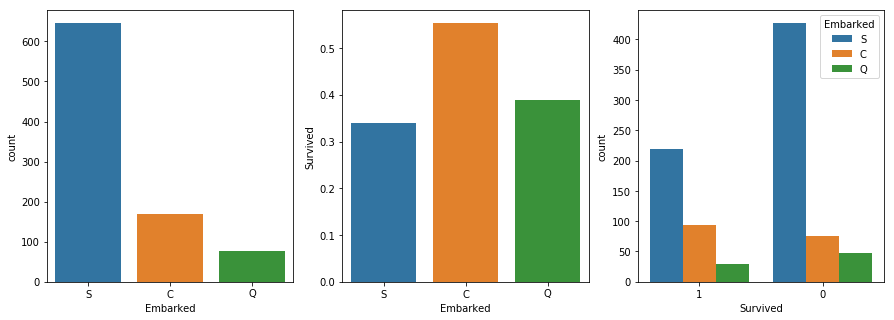

In [277]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5)) 

sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis2)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis3)


# Survived by have sibling or not

In [279]:
sibsp_df = titanic_df[titanic_df['SibSp'] != 0]
no_sibsp_df = titanic_df[titanic_df['SibSp'] == 0]

#Survived passager in Embarked S is largest，EmbarkedS Q is Minimum。Survived percentage in Embarked C is highest and S is lowest。

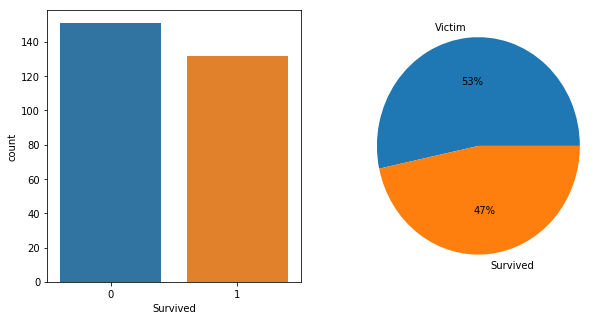

151 132


In [230]:
#the psassageer
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = sibsp_df )

plt.subplot(122)
plt.pie([sibsp_df['Survived'][sibsp_df['Survived'] == 0].count(),sibsp_df['Survived'].sum()],labels=['Victim', 'Survived'],autopct='%1.0f%%')
plt.show()
print sibsp_df['Survived'][sibsp_df['Survived'] == 0].count(), sibsp_df['Survived'].sum()

#the count of survived passagers have siblings is 132, survived percentage is 47%,higher than the average 38%

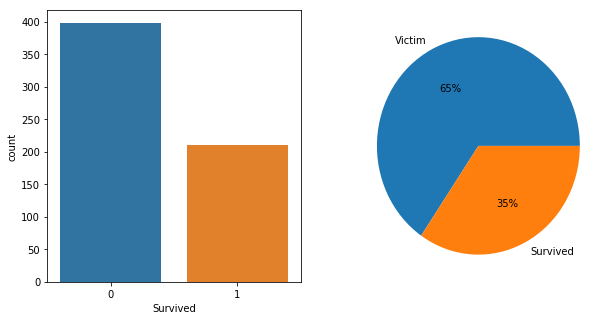

398 210


In [231]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = no_sibsp_df )

plt.subplot(122)
plt.pie([no_sibsp_df['Survived'][no_sibsp_df['Survived'] == 0].count(),no_sibsp_df['Survived'].sum()],labels=['Victim', 'Survived'],autopct='%1.0f%%')
plt.show()
print no_sibsp_df['Survived'][no_sibsp_df['Survived'] == 0].count(), no_sibsp_df['Survived'].sum()
#the count of Survived passsage have no siblings is 210, percentage is 35%,lower than the passsage have siblings.

In [232]:
# Survived by Parch
parch_df = titanic_df[titanic_df['Parch'] != 0]
no_parch_df = titanic_df[titanic_df['Parch'] == 0]

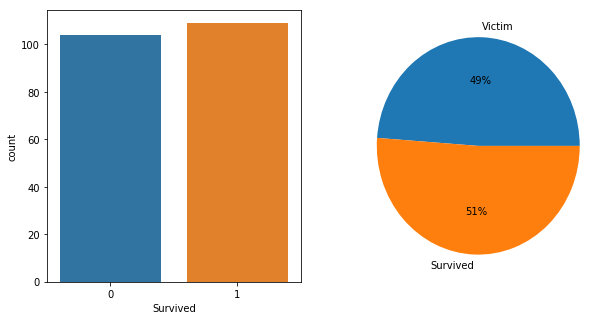

104 109


In [280]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = parch_df )

plt.subplot(122)
plt.pie([parch_df['Survived'][parch_df['Survived'] == 0].count(),parch_df['Survived'].sum()],labels=['Victim', 'Survived'],autopct='%1.0f%%')
plt.show()
print parch_df['Survived'][parch_df['Survived'] == 0].count(),parch_df['Survived'].sum()

the count of survived passagers have parent is 109, and the survived percentage is 51%

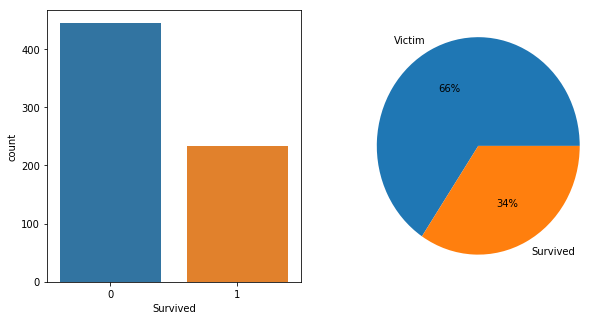

445 233


In [234]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = no_parch_df)

plt.subplot(122)
plt.pie([no_parch_df['Survived'][no_parch_df['Survived'] == 0].count(),no_parch_df['Survived'].sum()],labels=['Victim', 'Survived'],autopct='%1.0f%%')
plt.show()
print no_parch_df['Survived'][no_parch_df['Survived'] == 0].count(),no_parch_df['Survived'].sum()

#the count of survived passagers have no parent is 233, and the survived percentage is 34%
#the survived percentage of passengers have parent together is highter than passengers have no parent together 

In [281]:
data_by_location = titanic_df.groupby(['Sex','Age'],as_index=False).mean()

In [282]:
data_by_location.head()

,Sex,Age,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,female,0.75,557.500000,1.000000,3.0,2.0,1.0,19.258300
1,female,1.00,277.500000,1.000000,3.0,0.5,1.5,13.437500
2,female,2.00,379.666667,0.333333,2.5,1.5,1.5,43.245833
3,female,3.00,209.500000,0.500000,2.5,2.0,1.5,31.327100
4,female,4.00,451.600000,1.000000,2.6,0.8,1.2,22.828340


In [237]:
data_by_location.head()['Age']

0    0.75
1    1.00
2    2.00
3    3.00
4    4.00
Name: Age, dtype: float64

In [238]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [239]:
scaled_entries_1 = (data_by_location['Survived']/data_by_location['Survived'].std())

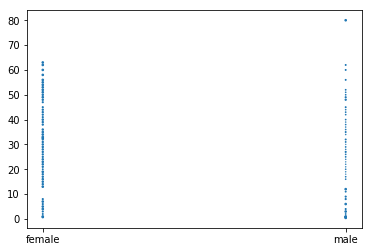

In [240]:
plt.scatter(data_by_location['Sex'],data_by_location['Age'],s=scaled_entries_1)

#female survived percentage is higher than male

In [283]:
data_by_location = titanic_df.groupby(['Pclass','Age'],as_index=False).mean()

In [284]:
data_by_location.head()

,Pclass,Age,PassengerId,Survived,SibSp,Parch,Fare
0,1,0.92,306.0,1.0,1.0,2.0,151.5500
1,1,2.00,298.0,0.0,1.0,2.0,151.5500
2,1,4.00,446.0,1.0,0.0,2.0,81.8583
3,1,11.00,803.0,1.0,1.0,2.0,120.0000
4,1,14.00,436.0,1.0,1.0,2.0,120.0000


In [243]:
data_by_location.head()['Age']

0     0.92
1     2.00
2     4.00
3    11.00
4    14.00
Name: Age, dtype: float64

In [244]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [245]:
scaled_entries_2 = (data_by_location['Survived']/data_by_location['Survived'].std())

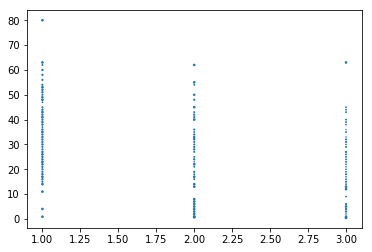

In [246]:
plt.scatter(data_by_location['Pclass'],data_by_location['Age'],s=scaled_entries_2)

In [285]:
data_by_location = titanic_df.groupby(['Fare','Age'],as_index=False).mean()

In [286]:
data_by_location.head()

,Fare,Age,PassengerId,Survived,Pclass,SibSp,Parch
0,0.0,19.0,559.5,0.0,2.0,0.0,0.0
1,0.0,20.0,467.0,0.0,2.0,0.0,0.0
2,0.0,23.0,278.0,0.0,2.0,0.0,0.0
3,0.0,25.0,272.0,1.0,3.0,0.0,0.0
4,0.0,28.0,634.0,0.0,1.0,0.0,0.0


In [287]:
data_by_location.head()['Age']

0    19.0
1    20.0
2    23.0
3    25.0
4    28.0
Name: Age, dtype: float64

In [288]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [289]:
scaled_entries = (data_by_location['Survived']/data_by_location['Survived'].std())

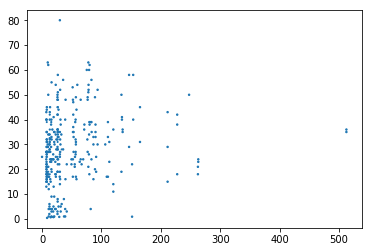

In [290]:
plt.scatter(data_by_location['Fare'],data_by_location['Age'],s=scaled_entries)

#通过绘图得知在泰坦尼克船上，获救的人集中在Fare较低（0,50]，年龄集中在10岁以上35岁以下乘客中的几率比较大

In [292]:
data_by_location = titanic_df.groupby(['Parch','SibSp'],as_index=False).mean()

In [293]:
data_by_location.head()

,Parch,SibSp,PassengerId,Survived,Pclass,Age,Fare
0,0,0,458.000000,0.303538,2.400372,31.471136,21.242689
1,0,1,399.609756,0.520325,1.959350,31.495935,42.610402
2,0,2,373.250000,0.250000,2.437500,29.562500,41.411200
3,0,3,406.500000,1.000000,2.500000,31.500000,18.425000
4,1,0,455.657895,0.657895,1.789474,29.300526,73.470400


In [255]:
data_by_location.head()['SibSp']

0    0
1    1
2    2
3    3
4    0
Name: SibSp, dtype: int64

In [256]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


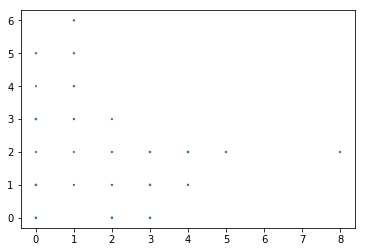

In [257]:
plt.scatter(data_by_location['SibSp'],data_by_location['Parch'],s=scaled_entries)


#no parents or siblings passagers survived percentage is lower.

# inconclusion, the female passenage in  Pclass _1, who have child,siblings parents on ship, age yonger, have higher persentge of Survived